<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/ml_dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd

# Загрузка данных
url = "https://gbcdn.mrgcdn.ru/uploads/asset/6057149/attachment/dcab3617fbc87c12cb7c8aa32e38c163.csv"
data = pd.read_csv(url)

# Выбор нужных столбцов
data = data[['GrLivArea', 'OverallQual', 'GarageArea', 'SaleCondition', 'SalePrice']]

In [100]:
# Проверка на пропущенные значения
print(data.isnull().sum())

# Удаление строк с пропущенными значениями (если они есть)
data = data.dropna()

GrLivArea        0
OverallQual      0
GarageArea       0
SaleCondition    0
SalePrice        0
dtype: int64


In [101]:
# One-Hot Encoding для SaleCondition
data = pd.get_dummies(data, columns=['SaleCondition'], drop_first=True, dtype=int)

In [102]:
def handle_outliers(df, column):
    """
    Заменяет выбросы на граничные значения.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)  # Заменяем выбросы на границы
    return df

# Обработка выбросов для числовых столбцов
numerical_columns = ['GrLivArea', 'OverallQual', 'GarageArea', 'SalePrice']
for column in numerical_columns:
    data = handle_outliers(data, column)

In [103]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE на обучающей выборке: {mae_train}")
print(f"MSE на обучающей выборке: {mse_train}")
print(f"MAE на тестовой выборке: {mae_test}")
print(f"MSE на тестовой выборке: {mse_test}")

MAE на обучающей выборке: 22533.017331048024
MSE на обучающей выборке: 931870101.1601987
MAE на тестовой выборке: 22334.944508441826
MSE на тестовой выборке: 818814961.6766396


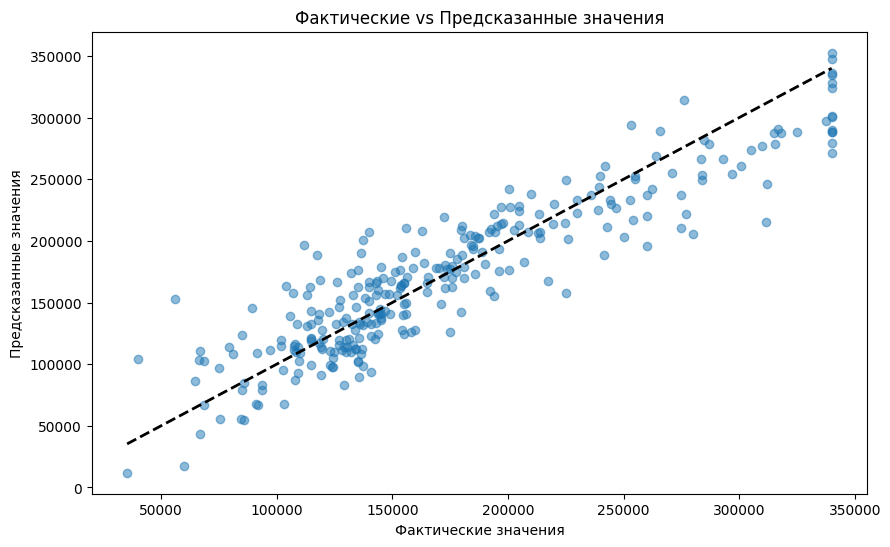

In [105]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

## Интерпретация:
1. Сравнение ошибок на обучающей и тестовой выборках:
MAE на обучающей выборке (22 533.02) и MAE на тестовой выборке (22 334.94) очень близки. Это говорит о том, что модель не переобучена и хорошо обобщает данные.

MSE на обучающей выборке (931 870 101.16) и MSE на тестовой выборке (818 814 961.68) также близки. Это подтверждает, что модель работает стабильно на новых данных.

Если бы ошибки на тестовой выборке были значительно выше, чем на обучающей, это могло бы указывать на переобучение. В вашем случае этого нет.

2. Абсолютные значения ошибок:
MAE ~22 500 означает, что в среднем модель ошибается на 22 500 единиц (например, долларов, если цена квартиры измеряется в долларах).

MSE ~900 000 000 — это квадрат ошибки, поэтому его сложнее интерпретировать напрямую. Однако он полезен для сравнения моделей.

Чтобы понять, насколько хороши эти значения, нужно сравнить их с масштабом целевой переменной (SalePrice). Например:

Если средняя цена квартиры (SalePrice) составляет 200 000, то ошибка в 22 500 — это примерно 11% от средней цены.

Если средняя цена квартиры 500 000, то ошибка в 22 500 — это примерно 4.5% от средней цены.

Чем меньше процент ошибки относительно среднего значения целевой переменной, тем лучше.

3. Качество модели:
Модель показывает хорошие результаты, так как ошибки на обучающей и тестовой выборках близки, а абсолютные значения ошибок относительно невелики.